In [80]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%pip install -q decorator==5.0.9
!pip install -q ipywidgets

import math
import re
import imp
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q cltk==1.0.22
%pip install -q strsim
%pip install -q leven

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import features.count_vectorizer.n_gram as thesisCountVectorizerNgramFeatures
import similarities.cosine as thesisCosineSimilarities
import similarities.levenshtein as thesisLevenshteinSimilarities
import vocabulary.vocabulary as thesisVocabulary
import features.lexical as thesisLexicalFeatures
import similarities.cosine as thesisCosineSimilarity
import text_cleanup.text_cleanup as thesisTextCleanUp
import p_aligment.p_aligment as thesisPAligment

imp.reload(thesisLexicalFeatures)
imp.reload(thesisCosineSimilarity)
imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisTfIdfNgramFeatures)
imp.reload(thesisVocabulary)
imp.reload(thesisCosineSimilarities)
imp.reload(thesisTextCleanUp)
imp.reload(thesisCountVectorizerNgramFeatures)
imp.reload(thesisPAligment)
imp.reload(thesisLevenshteinSimilarities)

<module 'similarities.levenshtein' from '../src/similarities/levenshtein.py'>

# Inner levenshtein distance metrics per corpus

In [5]:
london_corpus = thesisDataReader.get_london_by_new_line()
zwickau_corpus = thesisDataReader.get_zwickau_by_new_line()
breslau_corpus = thesisDataReader.get_breslau_by_new_line()

In [6]:
london_corpus_total_unique_words = set(' '.join(london_corpus).split())
zwickau_corpus_total_unique_words = set(' '.join(zwickau_corpus).split())
breslau_corpus_total_unique_words = set(' '.join(breslau_corpus).split())

In [7]:
print(len(london_corpus_total_unique_words))
print(len(zwickau_corpus_total_unique_words))
print(len(breslau_corpus_total_unique_words))

6507
6060
2942


In [8]:
possible_mistakes_london_to_london_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    error_threshold = 1
)


In [79]:
possible_mistakes_london_to_london_distance_1

{'portatum': [],
 'uehementer': [('uehementem', 1)],
 'nunctios': [('nuntios', 1)],
 'diuidebatur': [],
 'interfuit': [('interfui', 1)],
 'pertransiui': [],
 'tam': [],
 'pocius': [('tocius', 1)],
 'construere': [],
 'indi': [('inde', 1), ('india', 1)],
 'fortinum': [],
 'fuisset': [('fuisse', 1), ('fuissem', 1)],
 'ostendant': [('ostendunt', 1)],
 'iudicum': [('iudaicum', 1), ('iudicium', 1)],
 'palmis': [('palmas', 1), ('palis', 1)],
 'iabec': [('iaboc', 1)],
 'constitutas': [('constitutes', 1), ('constituta', 1)],
 'dorsum': [('morsum', 1), ('torsum', 1)],
 'laboris': [],
 'impleuerunt': [],
 'occidentis': [('occidenti', 1)],
 'pulcerrimo': [('pulcerrima', 1)],
 'beretum': [('beritum', 1)],
 'principis': [('principes', 1), ('principio', 1)],
 'pictura': [],
 'irretitus': [],
 'continue': [('continuo', 1)],
 'plana': [('plano', 1),
  ('plena', 1),
  ('lana', 1),
  ('plane', 1),
  ('planam', 1)],
 'ptolomaide': [('ptolomaida', 1), ('ptolomaidem', 1)],
 'fulonis': [],
 'pre': [],
 'nim

In [9]:
possible_mistakes_london_to_london_distance_2 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    error_threshold = 2
)


In [10]:
possible_mistakes_london_to_london_distance_3 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    error_threshold = 3
)


In [69]:
possible_mistakes_london_to_london_distance_4 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    error_threshold = 4
)


In [75]:
possible_mistakes_london_to_london_distance_5 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    error_threshold = 5
)


In [11]:
possible_mistakes_zwickau_to_zwickau_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    error_threshold = 1
)


In [12]:
possible_mistakes_zwickau_to_zwickau_distance_2 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    error_threshold = 2
)


In [13]:
possible_mistakes_zwickau_to_zwickau_distance_3 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    error_threshold = 3
)


In [70]:
possible_mistakes_zwickau_to_zwickau_distance_4 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    error_threshold = 4
)


In [76]:
possible_mistakes_zwickau_to_zwickau_distance_5 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    error_threshold = 5
)


In [14]:
possible_mistakes_breslau_to_breslau_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    error_threshold = 1
)


In [15]:
possible_mistakes_breslau_to_breslau_distance_2 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    error_threshold = 2
)


In [16]:
possible_mistakes_breslau_to_breslau_distance_3 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    error_threshold = 3
) 


In [71]:
possible_mistakes_breslau_to_breslau_distance_4 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    error_threshold = 4
) 


In [77]:
possible_mistakes_breslau_to_breslau_distance_5 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    error_threshold = 5
) 


In [60]:
possible_mistakes_breslau_to_breslau_distance_1

{'patria': [('patri', 1), ('patris', 1)],
 'sedes': [('pedes', 1), ('cedes', 1)],
 'unius': [('unus', 1)],
 'tertia': [('tertiam', 1)],
 'folia': [],
 'suspiria': [],
 'apostoli': [],
 'diuidebatur': [],
 'causam': [('causa', 1)],
 'opido': [],
 'pretiosas': [],
 'accedentibus': [],
 'tam': [],
 'partem': [('partes', 1), ('partim', 1), ('parte', 1)],
 'laborem': [],
 'sordes': [],
 'desiderium': [],
 'caldeam': [('caldea', 1)],
 'multis': [('multi', 1), ('multos', 1), ('multas', 1)],
 'quadam': [('quodam', 1), ('quandam', 1), ('quidam', 1), ('quedam', 1)],
 'paulatim': [('palatim', 1)],
 'prime': [('prima', 1), ('primo', 1)],
 'captus': [],
 'seperat': [],
 'aquas': [('quas', 1), ('aquam', 1), ('aquis', 1), ('aqua', 1)],
 'olofernis': [],
 'fuisset': [('fuissent', 1), ('fuisse', 1)],
 'durat': [('duram', 1)],
 'foris': [('fortis', 1)],
 'celo': [('melo', 1), ('celi', 1), ('celos', 1)],
 'erumpit': [],
 'operates': [('operatus', 1)],
 'habetur': [],
 'sed': [],
 'pascuis': [],
 'leucaru

([<matplotlib.axis.XTick at 0x7f9ffb5f3100>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3'),
  Text(3.25, 0, 'distance <= 4'),
  Text(4.25, 0, 'distance <= 5')])

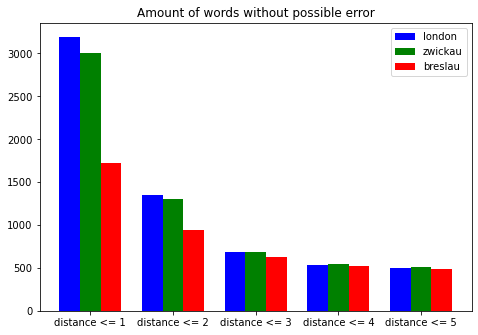

In [78]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_4 if len(possible_mistakes_london_to_london_distance_4[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_5 if len(possible_mistakes_london_to_london_distance_5[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_4 if len(possible_mistakes_zwickau_to_zwickau_distance_4[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_5 if len(possible_mistakes_zwickau_to_zwickau_distance_5[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_4 if len(possible_mistakes_breslau_to_breslau_distance_4[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_5 if len(possible_mistakes_breslau_to_breslau_distance_5[i]) == 0]),
    ]
]

X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='london')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='zwickau')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='breslau')

ax.set_title('Amount of words without possible error')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3', 'distance <= 4', 'distance <= 5'])


([<matplotlib.axis.XTick at 0x7fa06c798fa0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

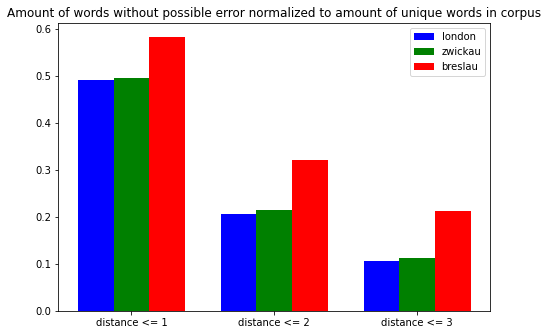

In [18]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) == 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) == 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) == 0]) / len(london_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) == 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) == 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) == 0]) / len(zwickau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) == 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) == 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) == 0]) / len(breslau_corpus_total_unique_words),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='london')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='zwickau')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='breslau')

ax.set_title('Amount of words without possible error normalized to amount of unique words in corpus')
ax.legend()

plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])

([<matplotlib.axis.XTick at 0x7fa038988430>,
 [Text(0.25, 0, 'distance error <= 1'),
  Text(1.25, 0, 'distance error <= 2'),
  Text(2.25, 0, 'distance error <= 3')])

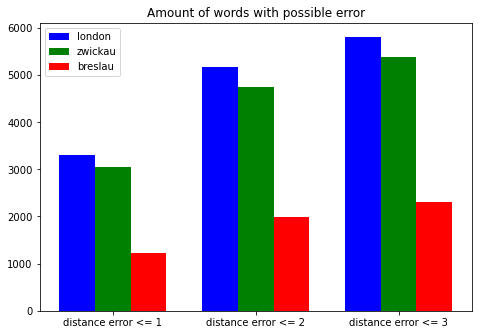

In [19]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) > 0]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='london')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='zwickau')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='breslau')

ax.set_title('Amount of words with possible error')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance error <= 1', 'distance error <= 2', 'distance error <= 3'])


([<matplotlib.axis.XTick at 0x7fa078fdebb0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

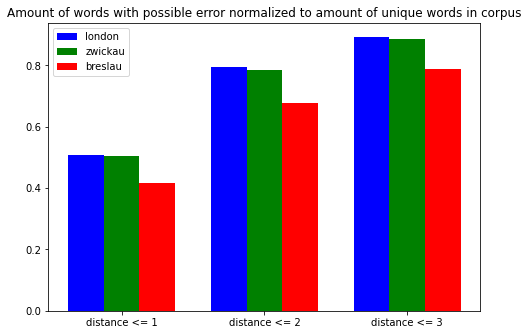

In [20]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) > 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) > 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) > 0]) / len(london_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) > 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) > 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) > 0]) / len(zwickau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) > 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) > 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) > 0]) / len(breslau_corpus_total_unique_words),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='london')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='zwickau')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='breslau')

ax.set_title('Amount of words with possible error normalized to amount of unique words in corpus')
ax.legend()

plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])

# Inner levenshtein distance metrics per p

In [21]:
london_p_score_distance_1 = thesisLevenshteinSimilarities.get_p_score(london_corpus, possible_mistakes_london_to_london_distance_1)
london_p_score_distance_2 = thesisLevenshteinSimilarities.get_p_score(london_corpus, possible_mistakes_london_to_london_distance_2)
london_p_score_distance_3 = thesisLevenshteinSimilarities.get_p_score(london_corpus, possible_mistakes_london_to_london_distance_3)

In [22]:
zwickau_p_score_distance_1 = thesisLevenshteinSimilarities.get_p_score(zwickau_corpus, possible_mistakes_zwickau_to_zwickau_distance_1)
zwickau_p_score_distance_2 = thesisLevenshteinSimilarities.get_p_score(zwickau_corpus, possible_mistakes_zwickau_to_zwickau_distance_2)
zwickau_p_score_distance_3 = thesisLevenshteinSimilarities.get_p_score(zwickau_corpus, possible_mistakes_zwickau_to_zwickau_distance_3)

In [23]:
breslau_p_score_distance_1 = thesisLevenshteinSimilarities.get_p_score(breslau_corpus, possible_mistakes_breslau_to_breslau_distance_1)
breslau_p_score_distance_2 = thesisLevenshteinSimilarities.get_p_score(breslau_corpus, possible_mistakes_breslau_to_breslau_distance_2)
breslau_p_score_distance_3 = thesisLevenshteinSimilarities.get_p_score(breslau_corpus, possible_mistakes_breslau_to_breslau_distance_3)

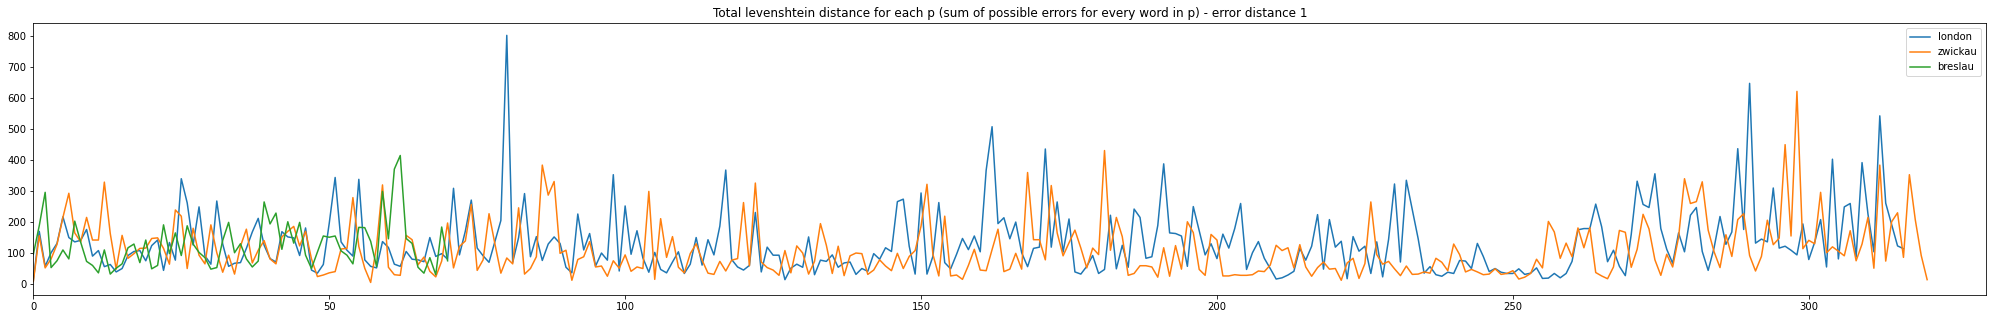

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_p_score_distance_1, label='london')
ax.plot(zwickau_p_score_distance_1, label='zwickau')
ax.plot(breslau_p_score_distance_1, label='breslau')


ax.set_xlim([0, 330])
ax.set_title('Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 1')
ax.legend()

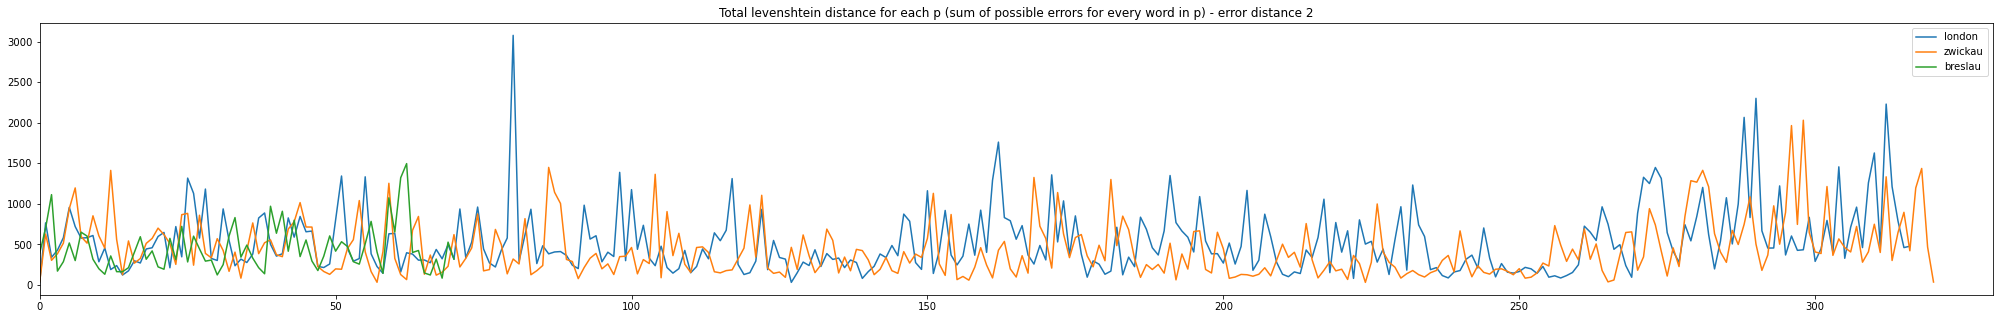

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_p_score_distance_2, label='london')
ax.plot(zwickau_p_score_distance_2, label='zwickau')
ax.plot(breslau_p_score_distance_2, label='breslau')


ax.set_xlim([0, 330])
ax.set_title('Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 2')
ax.legend()

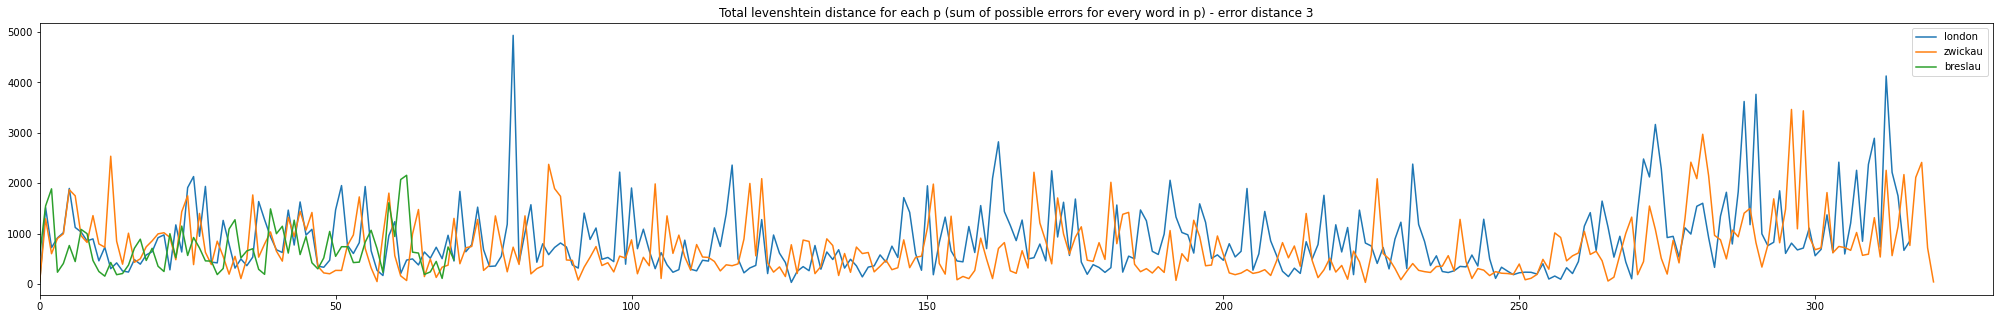

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_p_score_distance_3, label='london')
ax.plot(zwickau_p_score_distance_3, label='zwickau')
ax.plot(breslau_p_score_distance_3, label='breslau')


ax.set_xlim([0, 330])
ax.set_title('Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 3')
ax.legend()

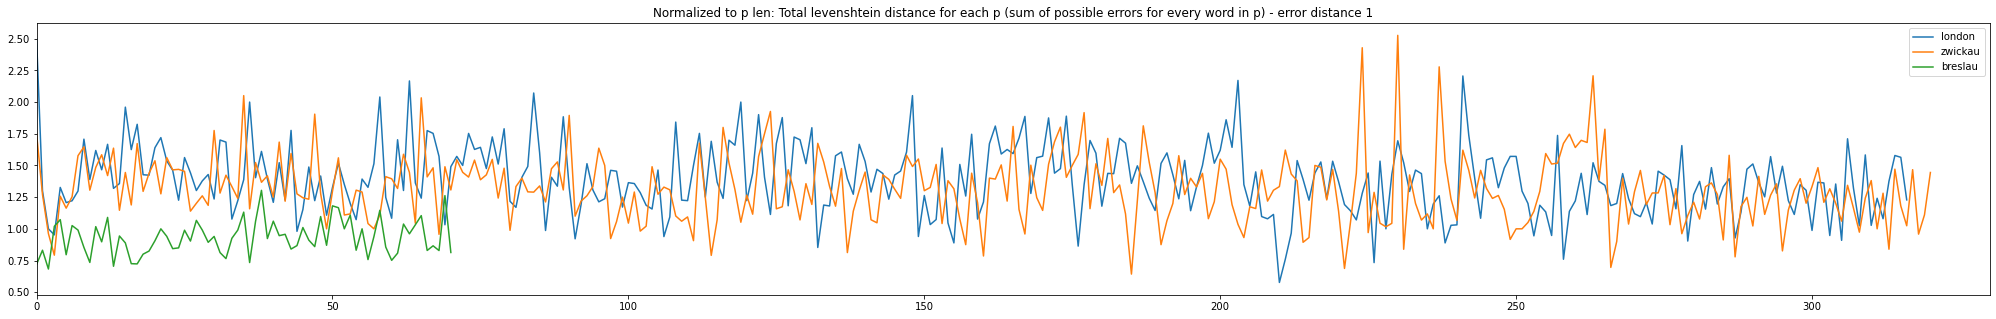

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_1)], label='london')
ax.plot([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_1)], label='zwickau')
ax.plot([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_1)], label='breslau')


ax.set_xlim([0, 330])
ax.set_title('Normalized to p len: Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 1')
ax.legend()

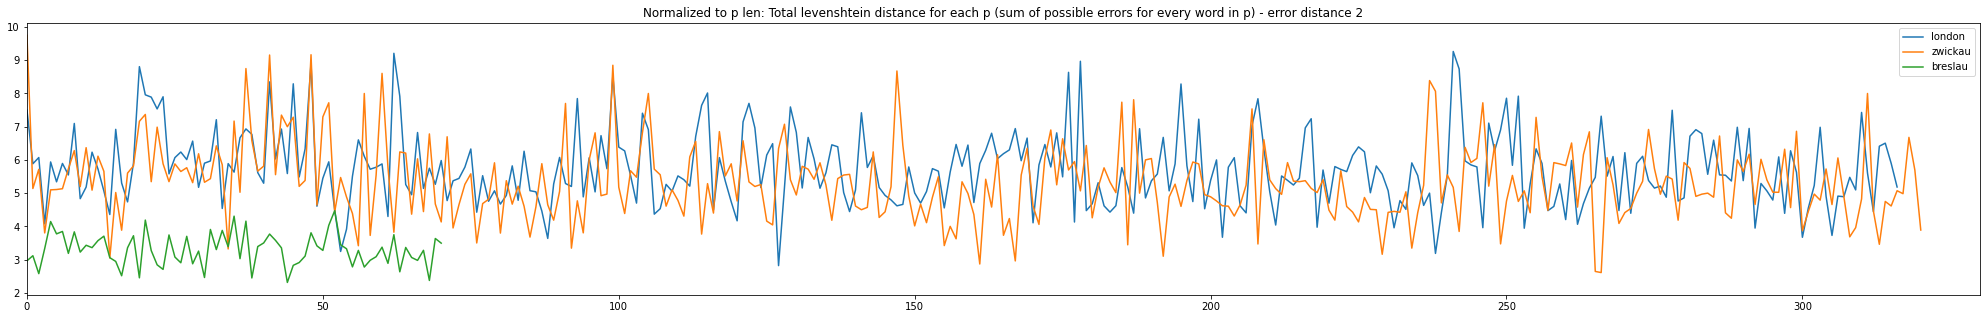

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_2)], label='london')
ax.plot([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_2)], label='zwickau')
ax.plot([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_2)], label='breslau')


ax.set_xlim([0, 330])
ax.set_title('Normalized to p len: Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 2')
ax.legend()

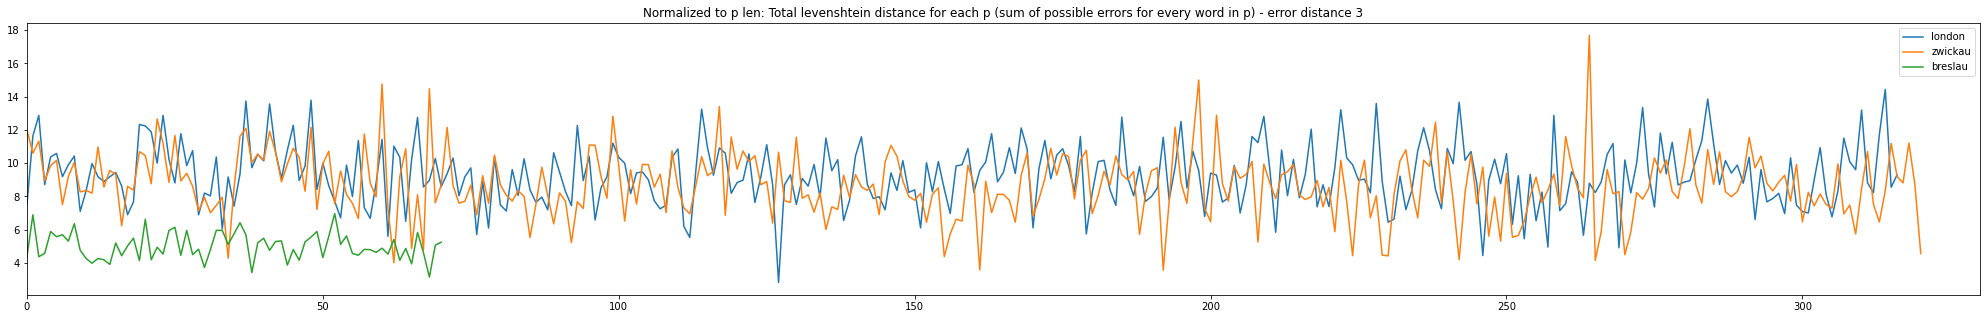

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_3)], label='london')
ax.plot([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_3)], label='zwickau')
ax.plot([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_3)], label='breslau')


ax.set_xlim([0, 330])
ax.set_title('Normalized to p len: Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 3')
ax.legend()

([<matplotlib.axis.XTick at 0x7f9fe87c87c0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

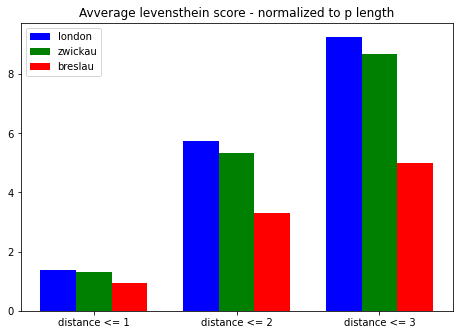

In [30]:
data = [
    [
        np.average([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_1)]),
        np.average([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_2)]),
        np.average([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_3)]),
    ],
    [
        np.average([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_1)]),
        np.average([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_2)]),
        np.average([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_3)]),
    ],
    [
        np.average([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_1)]),
        np.average([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_2)]),
        np.average([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_3)]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='london')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='zwickau')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='breslau')

ax.set_title('Avverage levensthein score - normalized to p length')
ax.legend()

plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])

# Levenshtein similarity on "burchard" version

In [31]:
burchard_based_on_london_corpus = thesisDataReader.get_burchard_candidate_version_based_on_p_aligment_london_base()
burchard_based_on_zwickau_corpus = thesisDataReader.get_burchard_candidate_version_based_on_p_aligment_zwickau_base()

In [32]:
burchard_based_on_london_corpus_unique_words = set(' '.join(burchard_based_on_london_corpus).split())
burchard_based_on_zwickau_corpus_unique_words = set(' '.join(burchard_based_on_zwickau_corpus).split())

In [33]:
print(len(burchard_based_on_london_corpus_unique_words))
print(len(burchard_based_on_zwickau_corpus_unique_words))

4574
4579


In [34]:
possible_mistakes_burchard_based_on_london_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    burchard_based_on_london_corpus,
    burchard_based_on_london_corpus,
    error_threshold = 1
)


In [35]:
possible_mistakes_burchard_based_on_london_distance_2 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    burchard_based_on_london_corpus,
    burchard_based_on_london_corpus,
    error_threshold = 2
)


In [36]:
possible_mistakes_burchard_based_on_london_distance_3 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    burchard_based_on_london_corpus,
    burchard_based_on_london_corpus,
    error_threshold = 3
)


In [37]:
possible_mistakes_burchard_based_on_zwickau_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    burchard_based_on_zwickau_corpus,
    burchard_based_on_zwickau_corpus,
    error_threshold = 1
)


In [38]:
possible_mistakes_burchard_based_on_zwickau_distance_2 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    burchard_based_on_zwickau_corpus,
    burchard_based_on_zwickau_corpus,
    error_threshold = 2
)


In [39]:
possible_mistakes_burchard_based_on_zwickau_distance_3 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    burchard_based_on_zwickau_corpus,
    burchard_based_on_zwickau_corpus,
    error_threshold = 3
)


([<matplotlib.axis.XTick at 0x7fa0490fb340>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

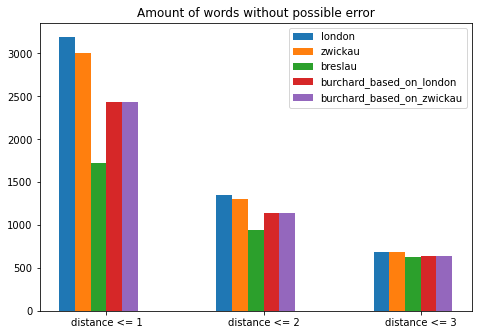

In [40]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_london_distance_1 if len(possible_mistakes_burchard_based_on_london_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_2 if len(possible_mistakes_burchard_based_on_london_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_3 if len(possible_mistakes_burchard_based_on_london_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_1 if len(possible_mistakes_burchard_based_on_zwickau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_2 if len(possible_mistakes_burchard_based_on_zwickau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_3 if len(possible_mistakes_burchard_based_on_zwickau_distance_3[i]) == 0]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.1
ax.bar(X + 0.0, data[0], width = width, label='london')
ax.bar(X + 0.1, data[1], width = width, label='zwickau')
ax.bar(X + 0.2, data[2], width = width, label='breslau')
ax.bar(X + 0.3, data[3], width = width, label='burchard_based_on_london')
ax.bar(X + 0.4, data[4], width = width, label='burchard_based_on_zwickau')

ax.set_title('Amount of words without possible error')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])


([<matplotlib.axis.XTick at 0x7fa07939fcd0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

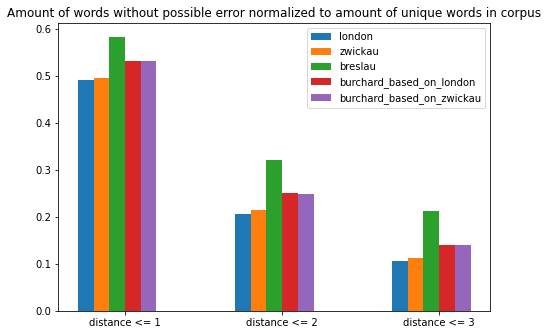

In [41]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) == 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) == 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) == 0]) / len(london_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) == 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) == 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) == 0]) / len(zwickau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) == 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) == 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) == 0]) / len(breslau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_london_distance_1 if len(possible_mistakes_burchard_based_on_london_distance_1[i]) == 0]) / len(burchard_based_on_london_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_2 if len(possible_mistakes_burchard_based_on_london_distance_2[i]) == 0]) / len(burchard_based_on_london_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_3 if len(possible_mistakes_burchard_based_on_london_distance_3[i]) == 0]) / len(burchard_based_on_london_corpus_unique_words),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_1 if len(possible_mistakes_burchard_based_on_zwickau_distance_1[i]) == 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_2 if len(possible_mistakes_burchard_based_on_zwickau_distance_2[i]) == 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_3 if len(possible_mistakes_burchard_based_on_zwickau_distance_3[i]) == 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.1
ax.bar(X + 0.0, data[0], width = width, label='london')
ax.bar(X + 0.1, data[1], width = width, label='zwickau')
ax.bar(X + 0.2, data[2], width = width, label='breslau')
ax.bar(X + 0.3, data[3], width = width, label='burchard_based_on_london')
ax.bar(X + 0.4, data[4], width = width, label='burchard_based_on_zwickau')

ax.set_title('Amount of words without possible error normalized to amount of unique words in corpus')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])


([<matplotlib.axis.XTick at 0x7fa0390a0fd0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

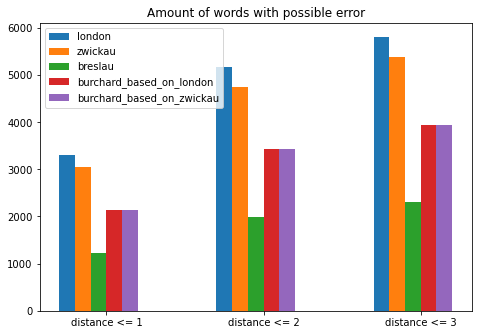

In [42]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_london_distance_1 if len(possible_mistakes_burchard_based_on_london_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_2 if len(possible_mistakes_burchard_based_on_london_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_3 if len(possible_mistakes_burchard_based_on_london_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_1 if len(possible_mistakes_burchard_based_on_zwickau_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_2 if len(possible_mistakes_burchard_based_on_zwickau_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_3 if len(possible_mistakes_burchard_based_on_zwickau_distance_3[i]) > 0]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.1
ax.bar(X + 0.0, data[0], width = width, label='london')
ax.bar(X + 0.1, data[1], width = width, label='zwickau')
ax.bar(X + 0.2, data[2], width = width, label='breslau')
ax.bar(X + 0.3, data[3], width = width, label='burchard_based_on_london')
ax.bar(X + 0.4, data[4], width = width, label='burchard_based_on_zwickau')

ax.set_title('Amount of words with possible error')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])


([<matplotlib.axis.XTick at 0x7fa0393f77c0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

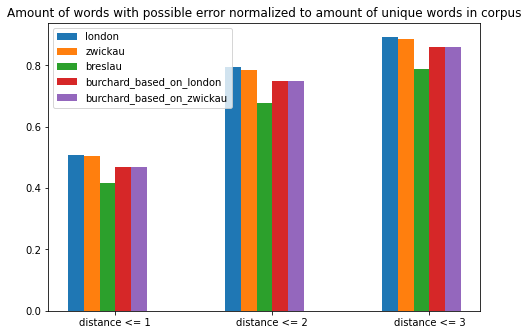

In [43]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) > 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) > 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) > 0]) / len(london_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) > 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) > 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) > 0]) / len(zwickau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) > 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) > 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) > 0]) / len(breslau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_london_distance_1 if len(possible_mistakes_burchard_based_on_london_distance_1[i]) > 0]) / len(burchard_based_on_london_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_2 if len(possible_mistakes_burchard_based_on_london_distance_2[i]) > 0]) / len(burchard_based_on_london_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_3 if len(possible_mistakes_burchard_based_on_london_distance_3[i]) > 0]) / len(burchard_based_on_london_corpus_unique_words),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_1 if len(possible_mistakes_burchard_based_on_zwickau_distance_1[i]) > 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_2 if len(possible_mistakes_burchard_based_on_zwickau_distance_2[i]) > 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_3 if len(possible_mistakes_burchard_based_on_zwickau_distance_3[i]) > 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.1
ax.bar(X + 0.0, data[0], width = width, label='london')
ax.bar(X + 0.1, data[1], width = width, label='zwickau')
ax.bar(X + 0.2, data[2], width = width, label='breslau')
ax.bar(X + 0.3, data[3], width = width, label='burchard_based_on_london')
ax.bar(X + 0.4, data[4], width = width, label='burchard_based_on_zwickau')

ax.set_title('Amount of words with possible error normalized to amount of unique words in corpus')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])


# Inner levenshtein distance metrics per p - burchard candidate

In [44]:
burchard_based_on_london_p_score_distance_1 = thesisLevenshteinSimilarities.get_p_score(burchard_based_on_london_corpus, possible_mistakes_burchard_based_on_london_distance_1)
burchard_based_on_london_p_score_distance_2 = thesisLevenshteinSimilarities.get_p_score(burchard_based_on_london_corpus, possible_mistakes_burchard_based_on_london_distance_2)
burchard_based_on_london_p_score_distance_3 = thesisLevenshteinSimilarities.get_p_score(burchard_based_on_london_corpus, possible_mistakes_burchard_based_on_london_distance_3)

In [45]:
burchard_based_on_zwickau_p_score_distance_1 = thesisLevenshteinSimilarities.get_p_score(burchard_based_on_zwickau_corpus, possible_mistakes_burchard_based_on_zwickau_distance_1)
burchard_based_on_zwickau_p_score_distance_2 = thesisLevenshteinSimilarities.get_p_score(burchard_based_on_zwickau_corpus, possible_mistakes_burchard_based_on_zwickau_distance_2)
burchard_based_on_zwickau_p_score_distance_3 = thesisLevenshteinSimilarities.get_p_score(burchard_based_on_zwickau_corpus, possible_mistakes_burchard_based_on_zwickau_distance_3)

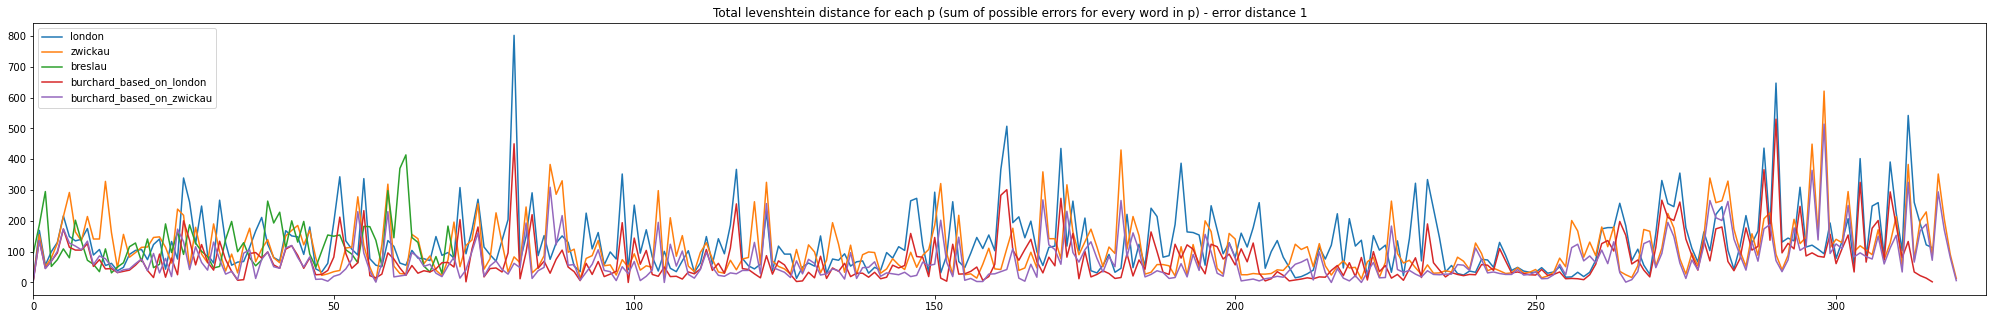

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_p_score_distance_1, label='london')
ax.plot(zwickau_p_score_distance_1, label='zwickau')
ax.plot(breslau_p_score_distance_1, label='breslau')

ax.plot(burchard_based_on_london_p_score_distance_1, label='burchard_based_on_london')
ax.plot(burchard_based_on_zwickau_p_score_distance_1, label='burchard_based_on_zwickau')


ax.set_xlim([0, 325])
ax.set_title('Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 1')
ax.legend()

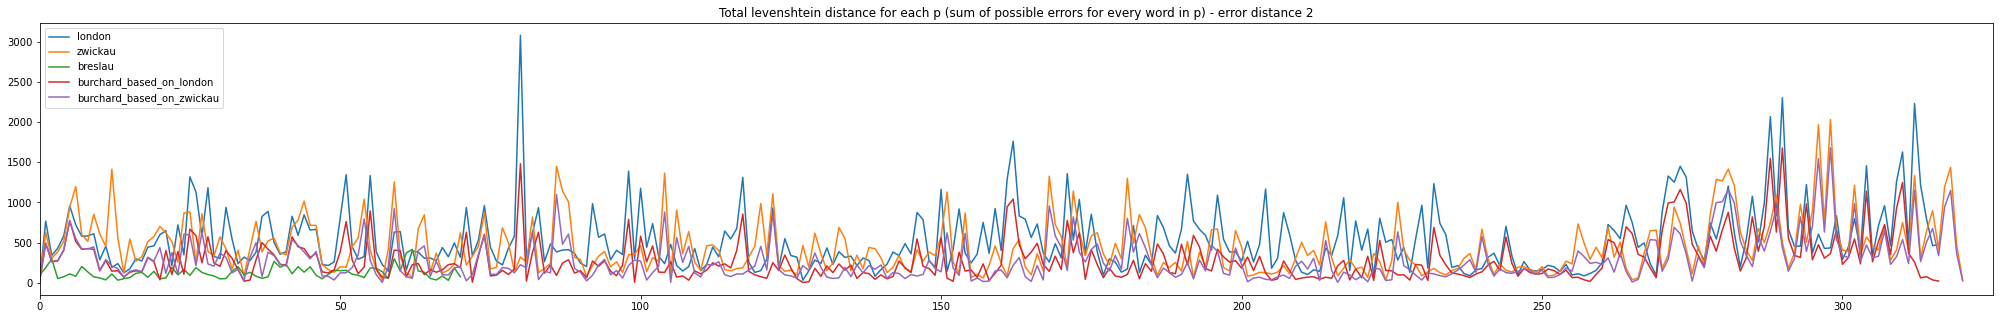

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_p_score_distance_2, label='london')
ax.plot(zwickau_p_score_distance_2, label='zwickau')
ax.plot(breslau_p_score_distance_1, label='breslau')

ax.plot(burchard_based_on_london_p_score_distance_2, label='burchard_based_on_london')
ax.plot(burchard_based_on_zwickau_p_score_distance_2, label='burchard_based_on_zwickau')


ax.set_xlim([0, 325])
ax.set_title('Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 2')
ax.legend()

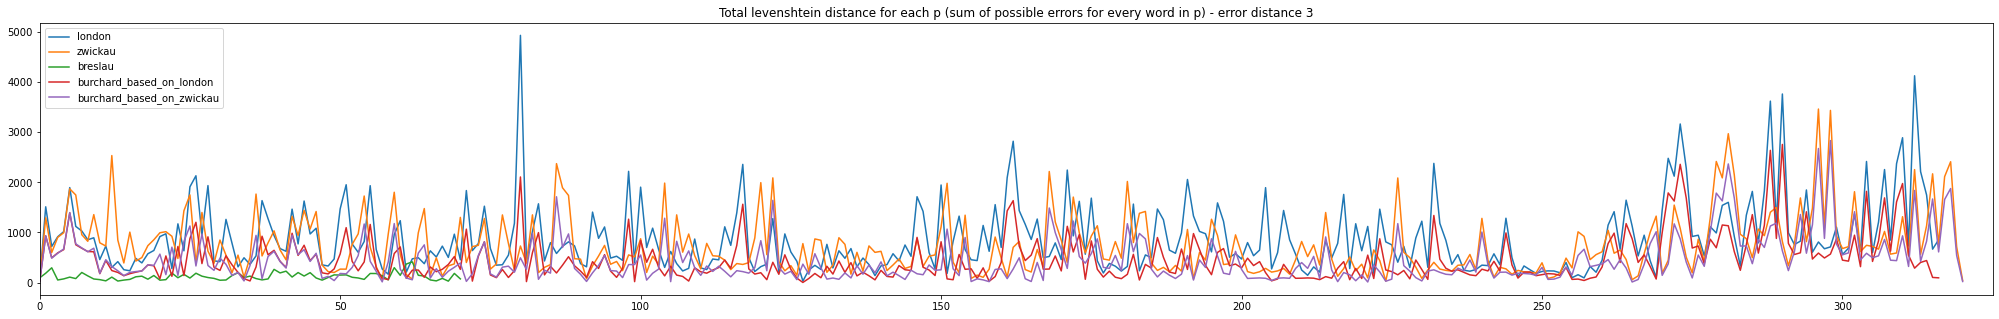

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_p_score_distance_3, label='london')
ax.plot(zwickau_p_score_distance_3, label='zwickau')
ax.plot(breslau_p_score_distance_1, label='breslau')

ax.plot(burchard_based_on_london_p_score_distance_3, label='burchard_based_on_london')
ax.plot(burchard_based_on_zwickau_p_score_distance_3, label='burchard_based_on_zwickau')


ax.set_xlim([0, 325])
ax.set_title('Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 3')
ax.legend()

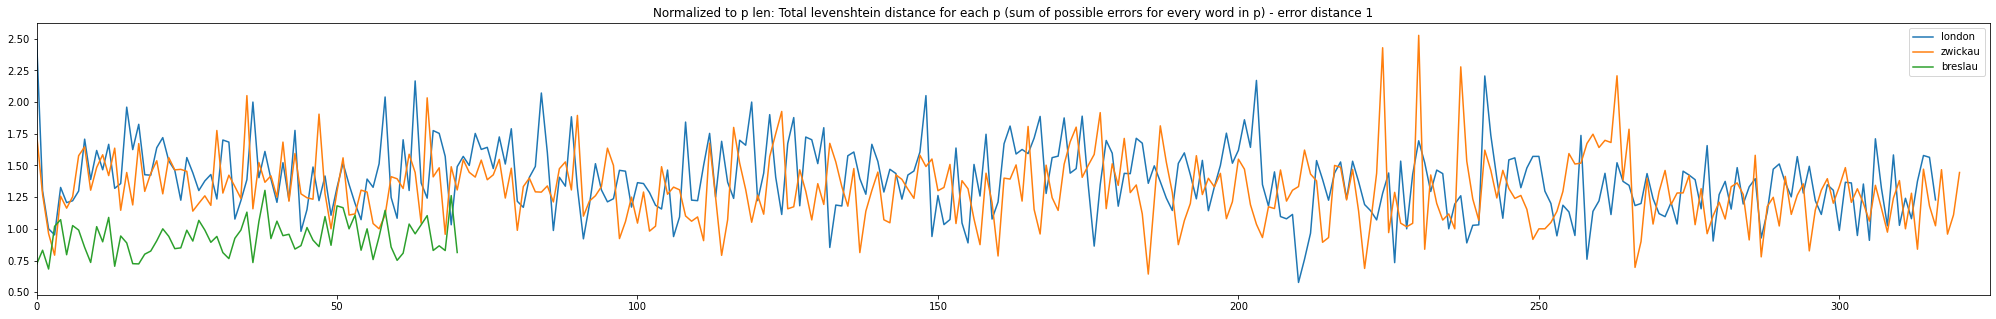

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_1)], label='london')
ax.plot([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_1)], label='zwickau')
ax.plot([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_1)], label='breslau')

# ax.plot([ p / len(burchard_based_on_london_corpus[i].split()) for i, p in enumerate(burchard_based_on_london_p_score_distance_1)], label='burchard_based_on_london')
# ax.plot([ p / len(burchard_based_on_zwickau_corpus[i].split()) for i, p in enumerate(burchard_based_on_zwickau_p_score_distance_1)], label='burchard_based_on_zwickau')



ax.set_xlim([0, 325])
ax.set_title('Normalized to p len: Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 1')
ax.legend()

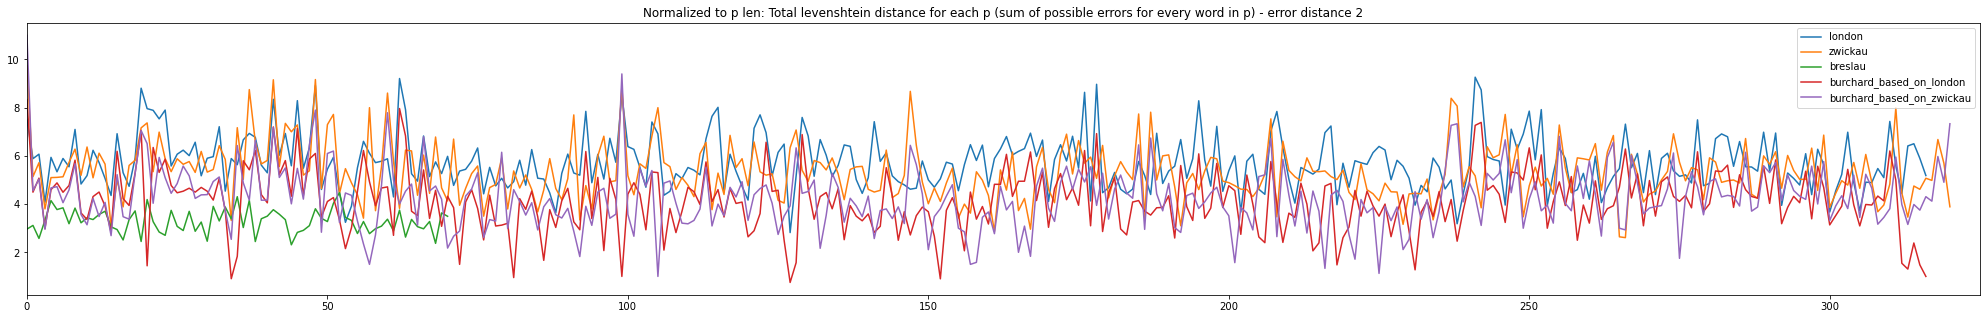

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_2)], label='london')
ax.plot([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_2)], label='zwickau')
ax.plot([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_2)], label='breslau')

ax.plot([ p / len(burchard_based_on_london_corpus[i].split()) for i, p in enumerate(burchard_based_on_london_p_score_distance_2)], label='burchard_based_on_london')
ax.plot([ p / len(burchard_based_on_zwickau_corpus[i].split()) for i, p in enumerate(burchard_based_on_zwickau_p_score_distance_2)], label='burchard_based_on_zwickau')



ax.set_xlim([0, 325])
ax.set_title('Normalized to p len: Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 2')
ax.legend()

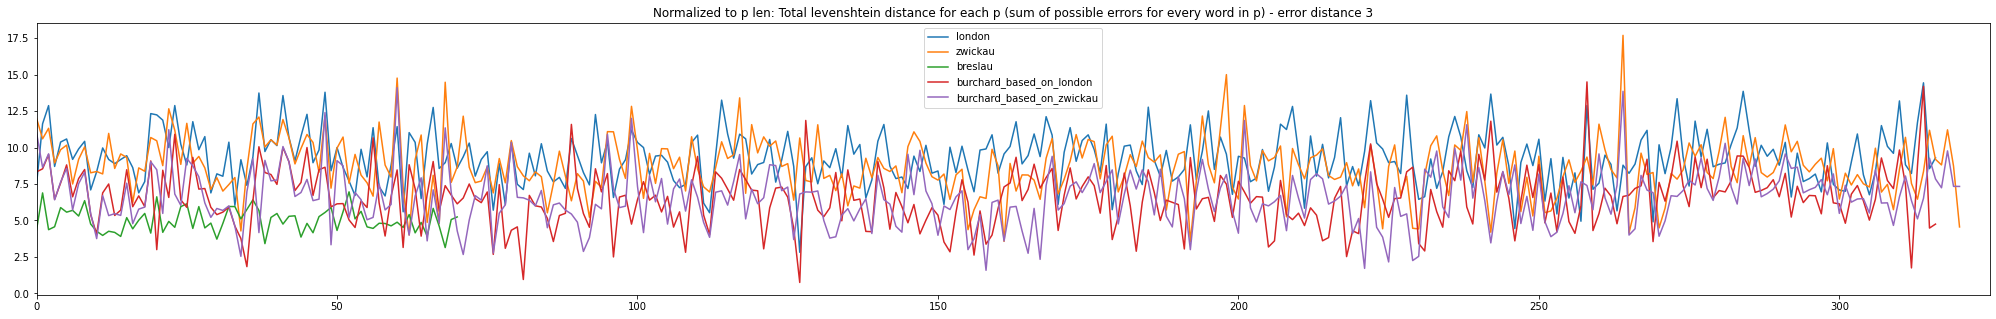

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_3)], label='london')
ax.plot([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_3)], label='zwickau')
ax.plot([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_3)], label='breslau')

ax.plot([ p / len(burchard_based_on_london_corpus[i].split()) for i, p in enumerate(burchard_based_on_london_p_score_distance_3)], label='burchard_based_on_london')
ax.plot([ p / len(burchard_based_on_zwickau_corpus[i].split()) for i, p in enumerate(burchard_based_on_zwickau_p_score_distance_3)], label='burchard_based_on_zwickau')



ax.set_xlim([0, 325])
ax.set_title('Normalized to p len: Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 3')
ax.legend()

([<matplotlib.axis.XTick at 0x7f9fe82846d0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

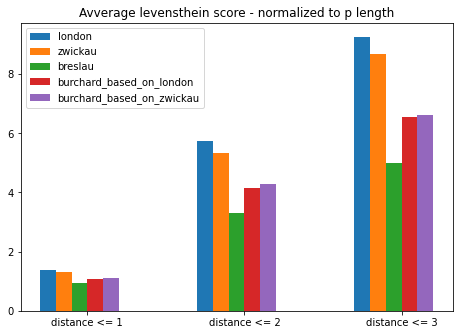

In [52]:
data = [
    [
        np.average([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_1)]),
        np.average([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_2)]),
        np.average([ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_3)]),
    ],
    [
        np.average([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_1)]),
        np.average([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_2)]),
        np.average([ p / len(zwickau_corpus[i].split()) for i, p in  enumerate(zwickau_p_score_distance_3)]),
    ],
    [
        np.average([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_1)]),
        np.average([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_2)]),
        np.average([ p / len(breslau_corpus[i].split()) for i, p in  enumerate(breslau_p_score_distance_3)]),
    ],
    [
        np.average([ p / len(burchard_based_on_london_corpus[i].split()) for i, p in  enumerate(burchard_based_on_london_p_score_distance_1)]),
        np.average([ p / len(burchard_based_on_london_corpus[i].split()) for i, p in  enumerate(burchard_based_on_london_p_score_distance_2)]),
        np.average([ p / len(burchard_based_on_london_corpus[i].split()) for i, p in  enumerate(burchard_based_on_london_p_score_distance_3)]),
    ],
    [
        np.average([ p / len(burchard_based_on_zwickau_corpus[i].split()) for i, p in  enumerate(burchard_based_on_zwickau_p_score_distance_1)]),
        np.average([ p / len(burchard_based_on_zwickau_corpus[i].split()) for i, p in  enumerate(burchard_based_on_zwickau_p_score_distance_2)]),
        np.average([ p / len(burchard_based_on_zwickau_corpus[i].split()) for i, p in  enumerate(burchard_based_on_zwickau_p_score_distance_3)]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.1
ax.bar(X + 0.0, data[0], width = width, label='london')
ax.bar(X + 0.1, data[1], width = width, label='zwickau')
ax.bar(X + 0.2, data[2], width = width, label='breslau')
ax.bar(X + 0.3, data[3], width = width, label='burchard_based_on_london')
ax.bar(X + 0.4, data[4], width = width, label='burchard_based_on_zwickau')

ax.set_title('Avverage levensthein score - normalized to p length')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])


# levenshtein distance on original text without preprocessing

In [53]:
def cleanup(t):
    # some english marks from breslau version, 236u in original is 236v
    clean_data = re.sub("\(236u is empty, 237r\)", '', t)
    clean_data = re.sub("\(237u is empty, 238r\)", '', clean_data)
    clean_data = re.sub("<q>", '', clean_data)
    clean_data = re.sub("<n>", '', clean_data)
    clean_data = re.sub("\[n\]", '', clean_data)
    
    # this regex handle (1r) and (49r) references that appear in b_london version
    # and (112vb) and (117r) that appear in a_zwickau version
    clean_data = re.sub(r'\([1-9][0-9]?[0-9]?[a-z][a-z]?\)', '', clean_data)

    # this regex handle 33o, 3o, 1283o in zwickau version
    clean_data = re.sub(r'[1-9][0-9]?[0-9]?[0-9]?o', '', clean_data)

    # in oritinal it is vii but because we are running uv replaces first it is uii
#     clean_data = re.sub(r'\bix\b', '', clean_data)
#     clean_data = re.sub(r'\bui?i?i\b', '', clean_data)
#     clean_data = re.sub(r'\bii?i?i\b', '', clean_data)
#     clean_data = re.sub(r'\bu\b', '', clean_data)

    
    # remove numbers
    clean_data = re.sub(r'[0-9]+', '', clean_data)

    clean_data = (clean_data
        .replace("„", "")
        .replace("“", "")
        .replace(".", "")
        .replace("!", "")
        .replace("[xxx]", "")
        .replace("[?]", "")
        .replace("[???]", "")
        .replace("[", "")
        .replace("]", "")
        .replace('****', '')
        .replace('***', '')
        .replace('*', '')
        .replace("?", "")
        .replace("‘","")
        .replace("’", "") 
        .replace("½", "")
        .replace(":", "")
        .replace(";", "")
        .replace(",", "")
        .replace("<", "")
        .replace(">", "")
        .replace("”", "")
        .replace("(", "")
        .replace(")", "")
#         .replace('y' , 'i') # from Yoni table
#         .replace("ff", "f") # from Yoni table
#         .replace("ll", "l") # from Yoni table
#         .replace("mm", "m") # from Yoni table
#         .replace('th', 't') # from Yoni table
#         .replace("tt", "t") # from Yoni table, MUST be be after th -> t
#         .replace("z", "s") # from Yoni table
#         .replace("ih", "i") # from Yoni table
#         .replace("Ih", "i") # from Yoni table
#         .replace("ph", "p") # from Yoni table
#         .replace("Ph", "p") # from Yoni table
#         .replace("ae", "e") # from Yoni table
#         .replace("cio", "tio") # from Yoni table
#         .replace("cia", "tia") # from Yoni table
#         .replace("ch", "c") # from Yoni table, MUST be after cia -> tia
#         .replace("tiu", "ciu") # from Yoni table
#         .replace("atque", "et") # from Yoni table
#         .replace("uel", "aut") # from Yoni table vel-->aut, cause of jv replacer it is changed
        
        .replace("  ", " ")
        .strip()
    )

    return clean_data

In [54]:
london_original_corpus = [ cleanup(t) for t in thesisTextCleanUp.tokenize_text(thesisDataReader.read_london()) ]
zwickau_original_corpus = [ cleanup(t) for t in thesisTextCleanUp.tokenize_text(thesisDataReader.read_zwickau()) ]

In [55]:
london_original_corpus_total_unique_words = set(' '.join(london_original_corpus).split())
zwickau_original_corpus_total_unique_words = set(' '.join(zwickau_original_corpus).split())

In [56]:
possible_mistakes_london_to_london_original_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    london_original_corpus,
    london_original_corpus,
    error_threshold = 1
)
possible_mistakes_london_to_london_original_distance_2 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    london_original_corpus,
    london_original_corpus,
    error_threshold = 2
)
possible_mistakes_london_to_london_original_distance_3 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    london_original_corpus,
    london_original_corpus,
    error_threshold = 3
)

In [57]:
possible_mistakes_zwickau_to_zwickau_original_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    zwickau_original_corpus,
    zwickau_original_corpus,
    error_threshold = 1
)
possible_mistakes_zwickau_to_zwickau_original_distance_2 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    zwickau_original_corpus,
    zwickau_original_corpus,
    error_threshold = 2
)
possible_mistakes_zwickau_to_zwickau_original_distance_3 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    zwickau_original_corpus,
    zwickau_original_corpus,
    error_threshold = 4
)

([<matplotlib.axis.XTick at 0x7fa0492e6490>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

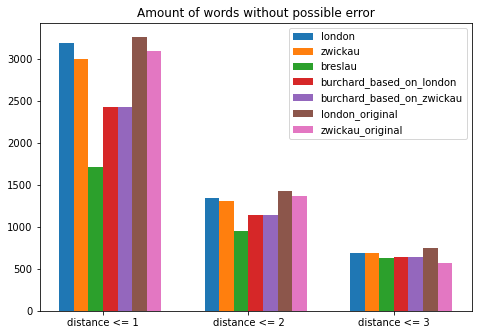

In [58]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_london_distance_1 if len(possible_mistakes_burchard_based_on_london_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_2 if len(possible_mistakes_burchard_based_on_london_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_3 if len(possible_mistakes_burchard_based_on_london_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_1 if len(possible_mistakes_burchard_based_on_zwickau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_2 if len(possible_mistakes_burchard_based_on_zwickau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_3 if len(possible_mistakes_burchard_based_on_zwickau_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_london_to_london_original_distance_1 if len(possible_mistakes_london_to_london_original_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_original_distance_2 if len(possible_mistakes_london_to_london_original_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_original_distance_3 if len(possible_mistakes_london_to_london_original_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_original_distance_1 if len(possible_mistakes_zwickau_to_zwickau_original_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_original_distance_2 if len(possible_mistakes_zwickau_to_zwickau_original_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_original_distance_3 if len(possible_mistakes_zwickau_to_zwickau_original_distance_3[i]) == 0]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.1
ax.bar(X + 0.0, data[0], width = width, label='london')
ax.bar(X + 0.1, data[1], width = width, label='zwickau')
ax.bar(X + 0.2, data[2], width = width, label='breslau')
ax.bar(X + 0.3, data[3], width = width, label='burchard_based_on_london')
ax.bar(X + 0.4, data[4], width = width, label='burchard_based_on_zwickau')
ax.bar(X + 0.5, data[5], width = width, label='london_original')
ax.bar(X + 0.6, data[6], width = width, label='zwickau_original')

ax.set_title('Amount of words without possible error')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])


([<matplotlib.axis.XTick at 0x7fa0799ec7c0>,
 [Text(0.25, 0, 'distance <= 1'),
  Text(1.25, 0, 'distance <= 2'),
  Text(2.25, 0, 'distance <= 3')])

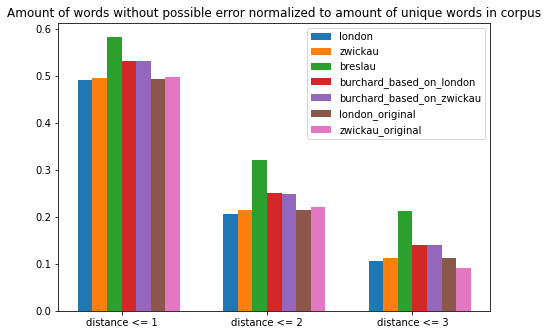

In [59]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) == 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) == 0]) / len(london_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) == 0]) / len(london_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) == 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) == 0]) / len(zwickau_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) == 0]) / len(zwickau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) == 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) == 0]) / len(breslau_corpus_total_unique_words),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) == 0]) / len(breslau_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_london_distance_1 if len(possible_mistakes_burchard_based_on_london_distance_1[i]) == 0]) / len(burchard_based_on_london_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_2 if len(possible_mistakes_burchard_based_on_london_distance_2[i]) == 0]) / len(burchard_based_on_london_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_london_distance_3 if len(possible_mistakes_burchard_based_on_london_distance_3[i]) == 0]) / len(burchard_based_on_london_corpus_unique_words),
    ],
    [
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_1 if len(possible_mistakes_burchard_based_on_zwickau_distance_1[i]) == 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_2 if len(possible_mistakes_burchard_based_on_zwickau_distance_2[i]) == 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
        len([i for i in possible_mistakes_burchard_based_on_zwickau_distance_3 if len(possible_mistakes_burchard_based_on_zwickau_distance_3[i]) == 0]) / len(burchard_based_on_zwickau_corpus_unique_words),
    ],
    [
        len([i for i in possible_mistakes_london_to_london_original_distance_1 if len(possible_mistakes_london_to_london_original_distance_1[i]) == 0]) / len(london_original_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_original_distance_2 if len(possible_mistakes_london_to_london_original_distance_2[i]) == 0]) / len(london_original_corpus_total_unique_words),
        len([i for i in possible_mistakes_london_to_london_original_distance_3 if len(possible_mistakes_london_to_london_original_distance_3[i]) == 0]) / len(london_original_corpus_total_unique_words),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_original_distance_1 if len(possible_mistakes_zwickau_to_zwickau_original_distance_1[i]) == 0]) / len(zwickau_original_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_original_distance_2 if len(possible_mistakes_zwickau_to_zwickau_original_distance_2[i]) == 0]) / len(zwickau_original_corpus_total_unique_words),
        len([i for i in possible_mistakes_zwickau_to_zwickau_original_distance_3 if len(possible_mistakes_zwickau_to_zwickau_original_distance_3[i]) == 0]) / len(zwickau_original_corpus_total_unique_words),
    ],
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.1
ax.bar(X + 0.0, data[0], width = width, label='london')
ax.bar(X + 0.1, data[1], width = width, label='zwickau')
ax.bar(X + 0.2, data[2], width = width, label='breslau')
ax.bar(X + 0.3, data[3], width = width, label='burchard_based_on_london')
ax.bar(X + 0.4, data[4], width = width, label='burchard_based_on_zwickau')
ax.bar(X + 0.5, data[5], width = width, label='london_original')
ax.bar(X + 0.6, data[6], width = width, label='zwickau_original')

ax.set_title('Amount of words without possible error normalized to amount of unique words in corpus')
ax.legend()

# plt.xticks(X, [1,2,3], color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xticks(X + 0.25, ['distance <= 1', 'distance <= 2', 'distance <= 3'])


In [ ]:
len(london_corpus[10].split())

In [ ]:
[ p / len(london_corpus[i].split()) for i, p in  enumerate(london_p_score_distance_1)]

In [ ]:
from similarity.normalized_levenshtein import NormalizedLevenshtein

normalized_levenshtein = NormalizedLevenshtein()
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))

print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))

In [ ]:
thesisLevenshteinSimilarities.get_edit_distance('My string', 'My $string')

In [ ]:
london_inner_levenshtein_distance = thesisLevenshteinSimilarities.get_inner_version_best_similarities(thesisDataReader.get_london_by_new_line())
zwickau_inner_levenshtein_distance = thesisLevenshteinSimilarities.get_inner_version_best_similarities(thesisDataReader.get_zwickau_by_new_line())
breslau_inner_levenshtein_distance = thesisLevenshteinSimilarities.get_inner_version_best_similarities(thesisDataReader.get_breslau_by_new_line())

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([i[0][1] for i in london_inner_levenshtein_distance], label='london')
ax.plot([i[0][1] for i in zwickau_inner_levenshtein_distance], label='zwickau')
ax.plot([i[0][1] for i in breslau_inner_levenshtein_distance], label='breslau')


ax.set_xlim([0, 330])
ax.legend()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p[0][1] / len(london_corpus[i]) for i, p in enumerate(london_inner_levenshtein_distance) ], label='london')
ax.plot([ p[0][1] / len(zwickau_corpus[i]) for i, p in enumerate(zwickau_inner_levenshtein_distance) ], label='zwickau')
ax.plot([ p[0][1] / len(breslau_corpus[i]) for i, p in enumerate(breslau_inner_levenshtein_distance) ], label='breslau')

ax.set_xlim([0, 330])
ax.legend()

In [ ]:
london_inner_levenshtein_distance[80]

In [ ]:
len("hello world")

In [ ]:
# len(thesisDataReader.get_london_by_new_line()[80])
for index, p in enumerate(thesisDataReader.get_london_by_new_line()):
    print(f'{index} - {len(p)}')

In [ ]:
def word_similarity_score_by_word(corpus_1, corpus_2):
    for index_1, p_1 in enumerate(corpus_1):
        for index_2, p_2 in enumerate(corpus_2):
            words_1 = p_1.split()
            words_2 = p_2.split()
            
            tuples = thesisLevenshteinSimilarities.get_similarity_tupels(words_1, words_2)
            print(p_1)
            print(tuples)
            print()

In [ ]:
word_similarity_score_by_word(thesisDataReader.get_london_by_new_line(), thesisDataReader.get_zwickau_by_new_line())

In [ ]:
from leven import levenshtein

In [ ]:
def words_mistakes(corpus_1, corpus_2, threshold = 2):
    words_1 = set(' '.join(corpus_1).split())
    words_2 = set(' '.join(corpus_2).split())
    
    result = {}
    
    for w_1 in words_1:
        result[w_1] = []
        
        for w_2 in words_2:
            lev_distance = levenshtein(w_1, w_2)
            
            if lev_distance == 0: continue
            if lev_distance >= math.trunc(len(w_1) / 2): continue
                
            if lev_distance < threshold:
                result[w_1].append((w_2, lev_distance))
    
    return result

In [ ]:
possible_mistakes_london_to_london_distance_1 = words_mistakes(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
)

In [ ]:
possible_mistakes_london_to_london_distance_2 = words_mistakes(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    threshold = 3
)

In [ ]:
possible_mistakes_london_to_london_distance_3 = words_mistakes(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    threshold = 4
)

In [ ]:
possible_mistakes_zwickau_to_zwickau_distance_1 = words_mistakes(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
)

In [ ]:
possible_mistakes_zwickau_to_zwickau_distance_2 = words_mistakes(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    threshold = 3
)

In [ ]:
possible_mistakes_zwickau_to_zwickau_distance_3 = words_mistakes(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    threshold = 4
)

In [ ]:
possible_mistakes_breslau_to_breslau_distance_1 = words_mistakes(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
)

In [ ]:
possible_mistakes_breslau_to_breslau_distance_2 = words_mistakes(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    threshold = 3
)

In [ ]:
possible_mistakes_breslau_to_breslau_distance_3 = words_mistakes(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    threshold = 4
)

In [ ]:
data

In [ ]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) > 0]),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) > 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) > 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) > 0]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='london')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='zwickau')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='breslau')
ax.legend()

In [ ]:
data = [
    [
        len([i for i in possible_mistakes_london_to_london_distance_1 if len(possible_mistakes_london_to_london_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_2 if len(possible_mistakes_london_to_london_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_london_to_london_distance_3 if len(possible_mistakes_london_to_london_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_1 if len(possible_mistakes_zwickau_to_zwickau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_2 if len(possible_mistakes_zwickau_to_zwickau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_zwickau_to_zwickau_distance_3 if len(possible_mistakes_zwickau_to_zwickau_distance_3[i]) == 0]),
    ],
    [
        len([i for i in possible_mistakes_breslau_to_breslau_distance_1 if len(possible_mistakes_breslau_to_breslau_distance_1[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_2 if len(possible_mistakes_breslau_to_breslau_distance_2[i]) == 0]),
        len([i for i in possible_mistakes_breslau_to_breslau_distance_3 if len(possible_mistakes_breslau_to_breslau_distance_3[i]) == 0]),
    ]
]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='london')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='zwickau')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label='breslau')
ax.legend()

In [ ]:
london_p_mistake_score_by_distance_1 = []

for index, p in enumerate(thesisDataReader.get_london_by_new_line()):
    words = p.split()
    score = 0
#     print(words)
    for w in words:
        mistakes = possible_mistakes_london_to_london_distance_1[w]
        if len(mistakes) == 0: continue
        
        for m in mistakes:
            score += m[1]
    
    london_p_mistake_score_by_distance_1.append(score / len(words))

In [ ]:
zwickau_p_mistake_score_by_distance_1 = []

for index, p in enumerate(thesisDataReader.get_zwickau_by_new_line()):
    words = p.split()
    score = 0
#     print(words)
    for w in words:
        mistakes = possible_mistakes_zwickau_to_zwickau_distance_1[w]
        if len(mistakes) == 0: continue
        
        for m in mistakes:
            score += m[1]
    
    zwickau_p_mistake_score_by_distance_1.append(score / len(words))

In [ ]:
breslau_p_mistake_score_by_distance_1 = []

for index, p in enumerate(thesisDataReader.get_breslau_by_new_line()):
    words = p.split()
    score = 0

    for w in words:
        mistakes = possible_mistakes_breslau_to_breslau_distance_1[w]
        if len(mistakes) == 0: continue
        
        for m in mistakes:
            score += m[1]
    
    breslau_p_mistake_score_by_distance_1.append(score / len(words))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_p_mistake_score_by_distance_1, label="london")
ax.plot(zwickau_p_mistake_score_by_distance_1, label="zwckau")
# ax.plot(breslau_p_mistake_score_by_distance_1, label="breslau")

ax.plot(london_zwickau_shared_parts_error_rate, label="london_zwickau_shared")
# 
# ax.plot(zwickau_by_zwickau_breslau_unique_paragraphs, label="zwickau_by_zwickau_breslau")
# ax.plot(breslau_by_zwickau_breslau_unique_paragraphs, label="breslau_by_zwickau_breslau")

# ax.plot(london_by_london_zwickau_unique_paragraphs, label="london_by_london_zwickau")
# ax.plot(zwickau_by_london_zwickau_unique_paragraphs, label="zwickau_by_london_zwickau")

ax.legend()

In [ ]:
# london_zwickau_breslau_strongly_similar_df = pd.read_csv('../computed_data/p_aligment/by_new_line/strongly_similar/london_zwickau_breslau.csv').drop(['Unnamed: 0'], axis=1)
london_zwickau_breslau_strongly_similar_df = pd.read_csv('../computed_data/p_aligment/by_new_line/london_zwickau_breslau.csv').drop(['Unnamed: 0'], axis=1)

In [ ]:
london_zwickau_breslau_strongly_similar_df

In [ ]:
result = []

for index, row in london_zwickau_breslau_strongly_similar_df.iterrows():
    london_text = row['london text']
    zwickau_text = row['zwickau text']
    
    london_without_shared_words = london_text
    zwickau_withoud_shared_words = zwickau_text
    
    shared_words = []
    for word in london_text.split():
        match_in_london = re.search(r'\b' + word + r'\b', london_text)
        match_in_zwickau = re.search(r'\b' + word + r'\b', zwickau_text)
        if match_in_london and match_in_zwickau:
            shared_words.append(word)
#             london_without_shared_words = re.sub(r'\b' + word + r'\b', '', london_without_shared_words).replace('  ', ' ').strip()
#             zwickau_withoud_shared_words = re.sub(r'\b' + word + r'\b', '', zwickau_withoud_shared_words).replace('  ', ' ').strip()
      
    result.append(shared_words)


In [ ]:
possible_mistakes_zwickau_to_london_shared_part_distance_1 = words_mistakes(
    [" ".join(i) for i in result],
    [" ".join(i) for i in result],
)

In [ ]:
possible_mistakes_zwickau_to_london_shared_part_distance_1

In [ ]:
london_zwickau_shared_parts_error_rate = []

for index, words in enumerate(result):
    score = 0
#     print(words)
    for w in words:
        mistakes = possible_mistakes_zwickau_to_london_shared_part_distance_1[w]
        if len(mistakes) == 0: continue
        
        for m in mistakes:
            score += m[1]
    
    london_zwickau_shared_parts_error_rate.append(score / len(words))

In [ ]:
london_zwickau_shared_parts_error_rate

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_zwickau_shared_parts_error_rate, label="london_zwickau_shared")
# ax.plot(zwickau_p_mistake_score_by_distance_1, label="zwckau")
# ax.plot(breslau_p_mistake_score_by_distance_1, label="breslau")
# 
# ax.plot(zwickau_by_zwickau_breslau_unique_paragraphs, label="zwickau_by_zwickau_breslau")
# ax.plot(breslau_by_zwickau_breslau_unique_paragraphs, label="breslau_by_zwickau_breslau")

# ax.plot(london_by_london_zwickau_unique_paragraphs, label="london_by_london_zwickau")
# ax.plot(zwickau_by_london_zwickau_unique_paragraphs, label="zwickau_by_london_zwickau")

ax.legend()